In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, KMeans
import scipy.cluster.hierarchy as sch

In [2]:
df = pd.read_csv("C:\\Users\\User\\Downloads\\wine.csv")

In [3]:
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
# perform PCA to reduce the dimensionality to 3
pca = PCA(n_components=3)
pca_values = pca.fit_transform(df.drop(['Type'],axis = 1))

In [5]:
pca_values

array([[ 3.18562979e+02,  2.14921307e+01,  3.13073470e+00],
       [ 3.03097420e+02, -5.36471768e+00,  6.82283550e+00],
       [ 4.38061133e+02, -6.53730945e+00, -1.11322298e+00],
       [ 7.33240139e+02,  1.92729032e-01, -9.17257016e-01],
       [-1.15714285e+01,  1.84899946e+01, -5.54422076e-01],
       [ 7.03231192e+02, -3.32158674e-01,  9.49375334e-01],
       [ 5.42971581e+02, -1.35189666e+01,  2.12694283e+00],
       [ 5.48401860e+02,  1.14494324e+01,  4.04924202e-02],
       [ 2.98036863e+02, -8.18015784e+00,  3.88097517e+00],
       [ 2.98049553e+02, -7.10154294e+00,  1.55845533e+00],
       [ 7.63079712e+02, -8.33431723e+00, -1.88629037e+00],
       [ 5.32943228e+02, -1.42876338e+01,  1.30335240e-01],
       [ 5.72834410e+02, -2.10050143e+01,  3.72614859e-01],
       [ 4.02925358e+02, -1.61026352e+01,  5.67513986e+00],
       [ 8.00053394e+02, -1.21184472e+01,  3.04652991e+00],
       [ 5.63245578e+02,  2.21482866e+00, -5.25510985e-01],
       [ 5.33379651e+02,  1.08048022e+01

In [6]:
# hierarchical clustering
comp = AgglomerativeClustering(n_clusters = 3 , linkage = 'complete')
comp_labels = comp.fit_predict(pca_values)
ward = AgglomerativeClustering(n_clusters = 3 , linkage = 'ward')
ward_labels = ward.fit_predict(pca_values)
single = AgglomerativeClustering(n_clusters = 3 , linkage = 'single')
single_labels = single.fit_predict(pca_values)
average = AgglomerativeClustering(n_clusters = 3 , linkage = 'average')
average_labels = average.fit_predict(pca_values)

In [7]:
cluster = pd.DataFrame(list(zip(comp_labels,ward_labels,single_labels,average_labels)),columns = ['Complete','Ward','Single','Average'])

In [8]:
cluster

,Complete,Ward,Single,Average
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,2,2
4,2,2,0,0
...,...,...,...,...
173,2,2,0,0
174,2,2,0,0
175,2,2,0,0
176,2,2,0,0


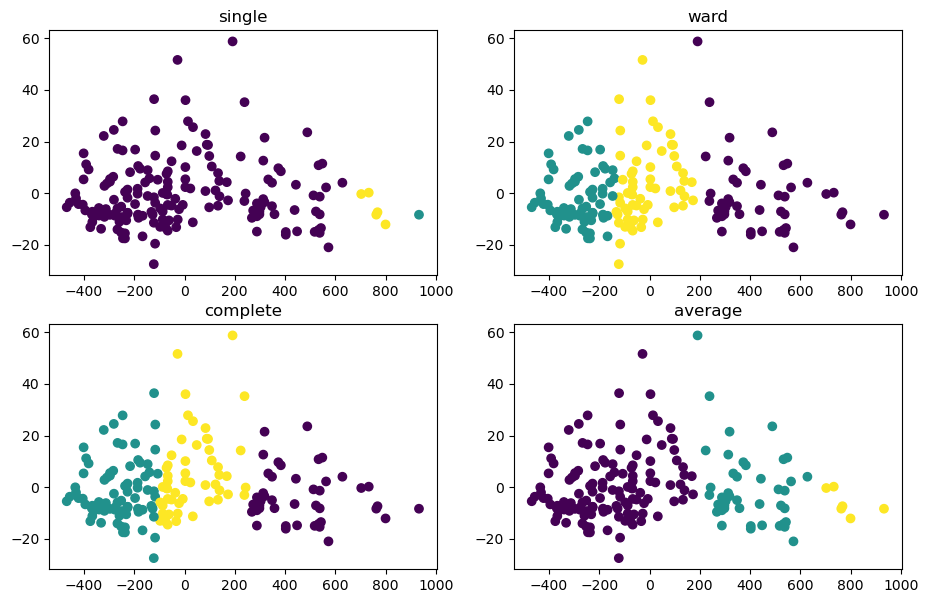

In [9]:
plt.figure(figsize=(11,7))

plt.subplot(221)
plt.scatter(pca_values[:, 0], pca_values[:, 1],c=single_labels)
plt.title("single")

plt.subplot(222)
plt.scatter(pca_values[:, 0], pca_values[:, 1], c=ward_labels)
plt.title("ward")

plt.subplot(223)
plt.scatter(pca_values[:, 0], pca_values[:, 1], c=comp_labels)
plt.title("complete")

plt.subplot(224)
plt.scatter(pca_values[:, 0], pca_values[:, 1], c=average_labels)
plt.title("average")

plt.show()

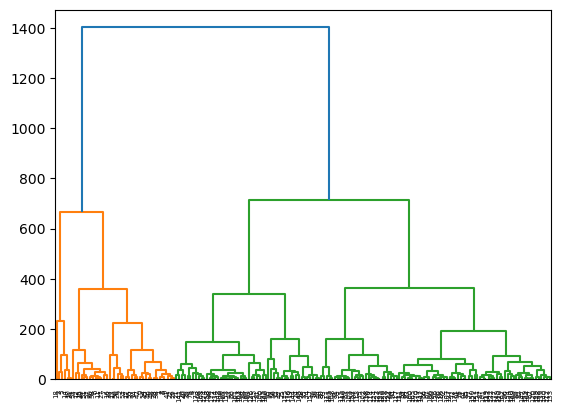

In [10]:
dendogram = sch.dendrogram(sch.linkage(pca_values, method = 'complete'))

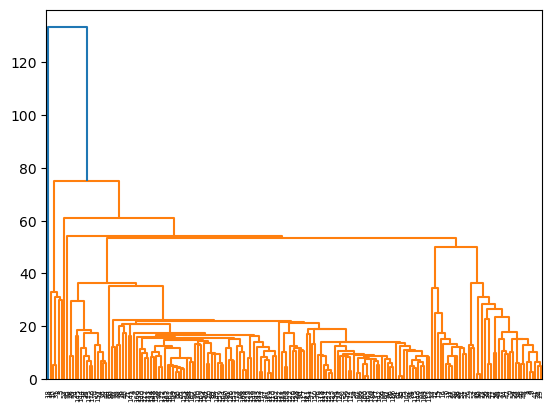

In [11]:
dendogram = sch.dendrogram(sch.linkage(pca_values, method = 'single'))

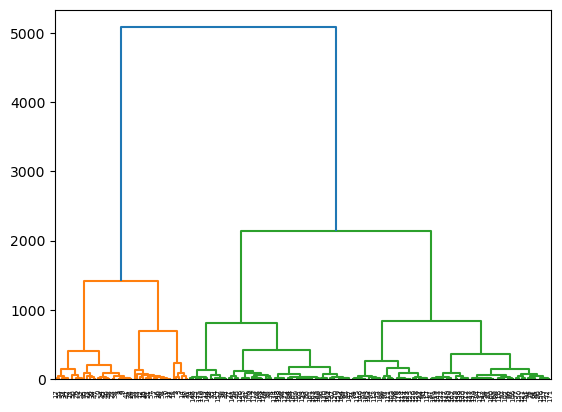

In [12]:
dendogram = sch.dendrogram(sch.linkage(pca_values, method = 'ward'))

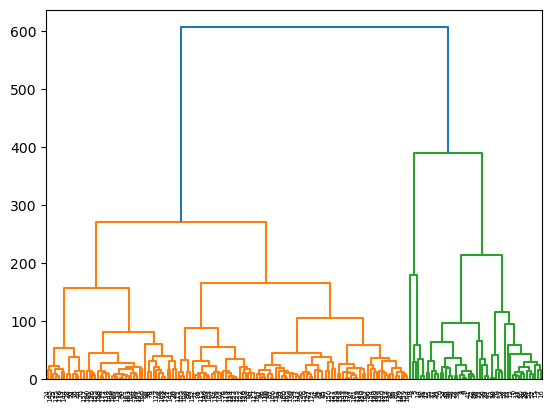

In [13]:
dendogram = sch.dendrogram(sch.linkage(pca_values, method = 'average'))

In [14]:
# Kmean Clustering
kmeans_inertia = []
# Kmeans_inertia calculates the squared Distance Inertia measures how well a dataset was clustered by K-Means
for k in range(1, 10):
    kmeans = KMeans(n_clusters = k,init='k-means++')
    kmeans.fit(pca_values)
    kmeans_inertia.append(kmeans.inertia_)

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


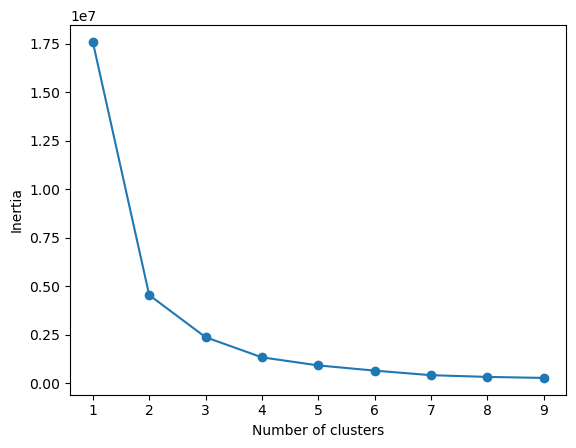

In [15]:
# plot the scree plot or elbow curve to determine the optimum number of clusters
plt.plot(range(1,10),kmeans_inertia,marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [16]:
# determine the optimum number of clusters based on the scree plot or elbow curve
# for example, if the curve shows an elbow at k=3, then set n_clusters=3 in the following line
kmeans = KMeans(n_clusters=3, init='k-means++')
kmeans_labels = kmeans.fit_predict(pca_values)

In [17]:
kmeans_labels

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 2, 0,
       2, 2, 0, 0, 0, 2, 2, 1, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0,
       0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2])

In [21]:
Kmeans= pd.Series(kmeans_labels)

In [28]:
Kmeans

0      1
1      1
2      1
3      1
4      0
      ..
173    0
174    0
175    0
176    0
177    2
Length: 178, dtype: int32

In [22]:
# compare the clustering results with the original class labels
original_labels = df['Type'].values
print('Hierarchical clustering:')
print(pd.crosstab(original_labels,comp_labels))# column represent agglo_labels and row represent original_labels
print('K-means clustering:')
print(pd.crosstab(original_labels, kmeans_labels))# column represent kmeans_lab and row represent original_labels

Hierarchical clustering:
col_0   0   1   2
row_0            
1      43   0  16
2       0  56  15
3       0  27  21
K-means clustering:
col_0   0   1   2
row_0            
1      13  46   0
2      20   1  50
3      29   0  19


In [25]:
final_df = pd.concat([pd.DataFrame(pca_values[:,0:3],columns=['pc1','pc2','pc3'])],axis = 1)
final_df

,pc1,pc2,pc3
0,318.562979,21.492131,3.130735
1,303.097420,-5.364718,6.822835
2,438.061133,-6.537309,-1.113223
3,733.240139,0.192729,-0.917257
4,-11.571428,18.489995,-0.554422
...,...,...,...
173,-6.980211,-4.541137,-2.474707
174,3.131605,2.335191,-4.309931
175,88.458074,18.776285,-2.237577
176,93.456242,18.670819,-1.788392


In [35]:
pd.concat([final_df,cluster],axis=1)

,pc1,pc2,pc3,Kmeans,Complete,Ward,Single,Average
0,318.562979,21.492131,3.130735,1,0,0,0,1
1,303.097420,-5.364718,6.822835,1,0,0,0,1
2,438.061133,-6.537309,-1.113223,1,0,0,0,1
3,733.240139,0.192729,-0.917257,1,0,0,2,2
4,-11.571428,18.489995,-0.554422,0,2,2,0,0
...,...,...,...,...,...,...,...,...
173,-6.980211,-4.541137,-2.474707,0,2,2,0,0
174,3.131605,2.335191,-4.309931,0,2,2,0,0
175,88.458074,18.776285,-2.237577,0,2,2,0,0
176,93.456242,18.670819,-1.788392,0,2,2,0,0
